In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Read the csv file into a pandas DataFrame
results = pd.read_csv('clean_datasets/merged_results.csv')
results.head()

,state,year,obesity_percentage,tobacco_percentage,per capita income,Deaths
0,Alabama,2011,32.10,24.3,34997,48681
1,Alabama,2012,33.07,23.8,35884,49301
2,Alabama,2013,32.59,21.5,36107,50189
3,Alabama,2014,33.57,21.1,37266,50215
4,Alabama,2015,35.67,21.4,38644,51909


In [3]:
#Sum per capita income 
mean_income=results["per capita income"].sum()
mean_income

13580064

In [4]:
# Create formula to get percent of total income
percent_total_income=(results["per capita income"]/mean_income)*100
percent_total_income

0      0.257709
1      0.264240
2      0.265882
3      0.274417
4      0.284564
         ...   
295    0.394159
296    0.389483
297    0.417583
298    0.420477
299    0.402134
Name: per capita income, Length: 300, dtype: float64

In [5]:
#Turn into DataFrame
percent_income=pd.DataFrame(percent_total_income)
percent_income

,per capita income
0,0.257709
1,0.264240
2,0.265882
3,0.274417
4,0.284564
...,...
295,0.394159
296,0.389483
297,0.417583
298,0.420477


In [6]:
#Rename Column 
results['percent_income']=percent_income
results

,state,year,obesity_percentage,tobacco_percentage,per capita income,Deaths,percent_income
0,Alabama,2011,32.10,24.3,34997,48681,0.257709
1,Alabama,2012,33.07,23.8,35884,49301,0.264240
2,Alabama,2013,32.59,21.5,36107,50189,0.265882
3,Alabama,2014,33.57,21.1,37266,50215,0.274417
4,Alabama,2015,35.67,21.4,38644,51909,0.284564
...,...,...,...,...,...,...,...
295,Wyoming,2012,24.58,21.8,53527,4481,0.394159
296,Wyoming,2013,27.59,20.6,52892,4516,0.389483
297,Wyoming,2014,29.17,19.5,56708,4666,0.417583
298,Wyoming,2015,28.81,19.1,57101,4778,0.420477


In [7]:
#Drop per capita income column 
results.drop(['per capita income'], axis=1)

,state,year,obesity_percentage,tobacco_percentage,Deaths,percent_income
0,Alabama,2011,32.10,24.3,48681,0.257709
1,Alabama,2012,33.07,23.8,49301,0.264240
2,Alabama,2013,32.59,21.5,50189,0.265882
3,Alabama,2014,33.57,21.1,50215,0.274417
4,Alabama,2015,35.67,21.4,51909,0.284564
...,...,...,...,...,...,...
295,Wyoming,2012,24.58,21.8,4481,0.394159
296,Wyoming,2013,27.59,20.6,4516,0.389483
297,Wyoming,2014,29.17,19.5,4666,0.417583
298,Wyoming,2015,28.81,19.1,4778,0.420477


In [8]:
#Reorder columns 
new_df=results[['state', 'year', 'obesity_percentage', 'tobacco_percentage', 'percent_income', 'Deaths']]
new_df

,state,year,obesity_percentage,tobacco_percentage,percent_income,Deaths
0,Alabama,2011,32.10,24.3,0.257709,48681
1,Alabama,2012,33.07,23.8,0.264240,49301
2,Alabama,2013,32.59,21.5,0.265882,50189
3,Alabama,2014,33.57,21.1,0.274417,50215
4,Alabama,2015,35.67,21.4,0.284564,51909
...,...,...,...,...,...,...
295,Wyoming,2012,24.58,21.8,0.394159,4481
296,Wyoming,2013,27.59,20.6,0.389483,4516
297,Wyoming,2014,29.17,19.5,0.417583,4666
298,Wyoming,2015,28.81,19.1,0.420477,4778


In [29]:
#Assign the data to X and y

X = new_df[["obesity_percentage", "tobacco_percentage", "percent_income"]]
y = new_df["Deaths"].values.reshape(-1, 1)
print(X.shape, y.shape)

(300, 3) (300, 1)


In [30]:
#Create training and testing data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [11]:
#Create the model using LinearRegression

from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [12]:
#Fit the model to the training data 
#Calculate scores for the training and testing data

model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.03237482670764269
Testing Score: 0.07542109300793487


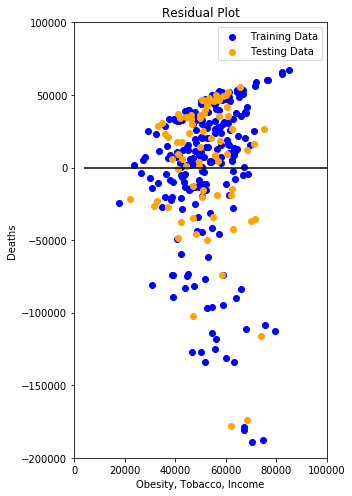

In [22]:
#Plot the residuals

fig= plt.figure(figsize=(5,7))

plt.scatter(model.predict(X_train), model.predict(X_train)- y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")

plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())

plt.gca().set(xlim=(0, 100000), ylim=(-200000, 100000),
              xlabel='Obesity, Tobacco, Income', ylabel='Deaths')

plt.title("Residual Plot")

plt.savefig("static/images/residual_plots.png", bbox_inches='tight')

plt.tight_layout() 

plt.show()

In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

#Fit model with features in X
model.fit(X, y)

score = model.score(X, y)
print(f"R2 Score: {score}")

R2 Score: 0.04724945921737311


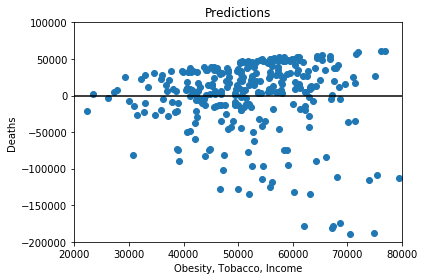

In [23]:
predictions = model.predict(X)

#Plot residuals
plt.scatter(predictions, predictions - y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.title("Predictions")

plt.gca().set(xlim=(20000, 80000), ylim=(-200000, 100000),
              xlabel='Obesity, Tobacco, Income', ylabel='Deaths')

plt.savefig("static/images/predictions.png", bbox_inches='tight')
plt.tight_layout() 
plt.show()